<a href="https://colab.research.google.com/github/Noahkandie/KNN-Titanic-Naive-Bayes-Spam-Project/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction

## Overview
This week's project requires us to implement a K-nearest neighbor (KNN) classifier on the Titanic dataset. Once we conduct the experiments, we will calculate the resulting metrics

## Research Question
We are expected to use KNN to predict survival rate based on given features in the titanic ship

##Metric for success
The project will be a success if we are able to create a model that will accurately determine whether or not a passenger survives or not given their specific features in the titanic ship. We will use accuracy score, ROC score ,confusion matrix and classification report as the metrics for testing perfomance of our models

## Understanding the context

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. This unfortunate incident resulted in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this analysis we will explore the data to understand which group of people had a better chance at surviving and then later build a model to predict what sorts of people were more likely to survive using passenger data (ie name, age, gender, socio-economic class, etc)

Experimental Design

    1. Prepare dataset(s) and clean them
    2. Carry out exhaustive EDA
    3. Carry out modelling using KNN
    4. Optimize the KNN model
    5. Challenge the Solution
    6. Document everything



The data provided is split into:

- Train set
- Test set

The Train dataset contains our target variable,survived and features, i.e passenger data. The Test set contains passenger information only. We will use training set to build our K-NN models. We will use the Test set to see how well your model performs on unseen data.

## Load libraries and Read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Loading the Data 
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

In [3]:
# Checking the info on both datasets
print('train',train.info())
print('\n')
print('**************************')
print('test',test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
train None


**************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerI

We can see missing values in several columns and note that Survived column is not in the test dataset. We also note the different datatypes e.g. we will need to change datatypes

In [4]:
# Previewing the top of our datasets
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Previewing the bottom of our dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Tidying the dataset


In [8]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lindqvist, Mr. Eino William",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


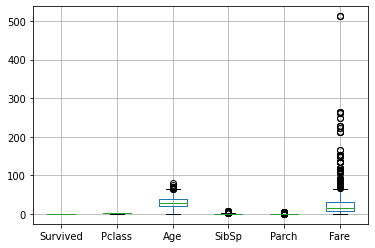

In [9]:
# Checking for Outliers
train.drop('PassengerId',axis=1,inplace=True)
train.boxplot()

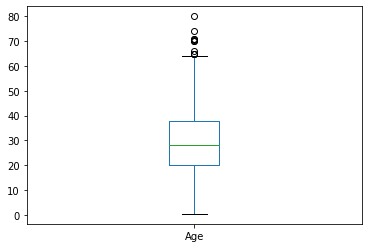

In [10]:
train['Age'].plot.box()

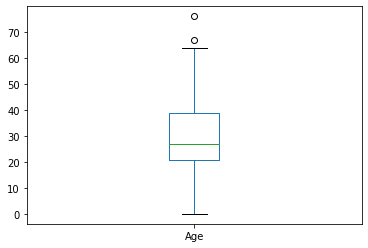

In [11]:
test['Age'].plot.box()

it is necessary to remove the outliers since KNN is sensitive to outliers. But since survival could mean older people were evacuated first, there is acae not to drop these outliers

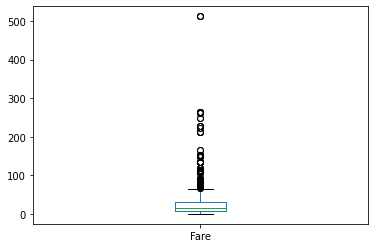

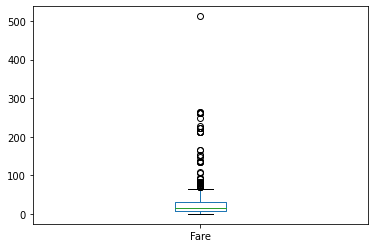

In [12]:
train['Fare'].plot.box()
plt.show()
test['Fare'].plot.box()



Our fare column has alot of outliers mainly because fare is paid according to the ticket class and distance to be travelled, for example Class 1 paid the highest and those travelling longer distances also paid more. Hence the reason for the outliers in this column. We cannot remove them because if we do we risk losing alot of information. We will remove the extreme outlier where fare is 500

In [13]:
#Removing the extreme outlier
train = train[train['Fare'] <= 400 ]
test= test[test['Fare'] <= 400 ]

In [14]:
# Identifying the Missing Data
train.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       686
Embarked      2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

Since the column cabin has over 70% missing values in both datasets, we drop it. We will fill in the embarked column with the embarking station that most common. We will also fill the column age with median.  
We will fill the null age values with median.

In [16]:
#Dealing with missing values
#For train set
train['Age'].fillna(value=train['Age'].median(), inplace=True)
train = train[train['Embarked'].notna()]
train = train.drop(['Cabin'], axis = 1) 
print(train.shape)
train.isnull().sum()


(886, 10)


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [17]:
#For test set
test['Age'].fillna(value=test['Age'].median(), inplace=True)
test = test.drop(['Cabin'], axis = 1) 
test = test[test['Fare'].notna()]
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
# Checking for duplicates
train.duplicated().value_counts()

False    886
dtype: int64

In [19]:
test.duplicated().value_counts()

False    416
dtype: int64

Since we have no duplicates, we can go on with our work

In [20]:
train['Embarked'].value_counts()

S    644
C    165
Q     77
Name: Embarked, dtype: int64

In [21]:
# Drop unneccessary columns
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [22]:
train=train.drop(columns=['Name','Ticket'])
test=test.drop(columns=['Name','Ticket','PassengerId'	])


## Exploratory Data Analysis

We shall use the train dataset to calculate EDA

In [23]:
# Age distributiontrain.describe()

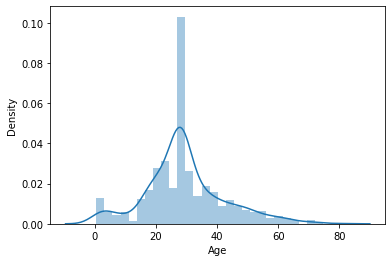

In [24]:

sns.distplot(train.Age)




The distribution appears to be normal and leptokurtic.


Text(0.5, 1.0, 'Gender of ToTal passengers')

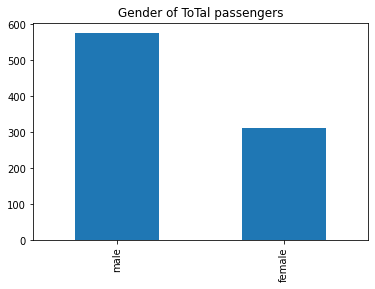

In [25]:
# Gender
# We will see the total number of both sexes and plot against the survived statistics
train['Sex'].value_counts().plot(kind='bar')
plt.title('Gender of ToTal passengers')

Text(0.5, 1.0, 'Gender of survived passengers')

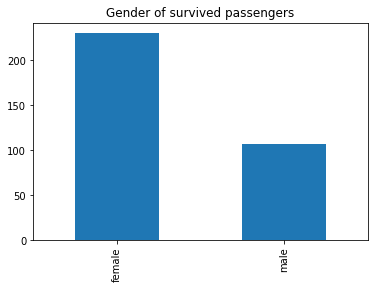

In [26]:
# The gender counts of survived passengers
surv=train[train['Survived']==1]
surv['Sex'].value_counts().plot(kind='bar')
plt.title('Gender of survived passengers')

Survived    0    1
Sex               
female     81  230
male      468  107
Survived         0         1
Sex                         
female    0.260450  0.739550
male      0.813913  0.186087


Text(0.5, 1.0, 'Gender ratio of survived passengers')

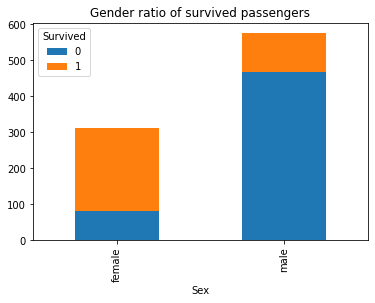

In [27]:
# Crosstab on gender and survival 
surv1=pd.crosstab(train['Sex'],train['Survived'])
print(surv1)
print(pd.crosstab(train['Sex'],train['Survived'],normalize=0))
surv1.plot.bar(stacked=True)
plt.title('Gender ratio of survived passengers')

There being a bias on the gender of the embarked pasengers: men who survived and embarked are more  =than the women , the was a higher ratio (74.03%) of women who survived compared to a low ratio of men (18.89%)

3    491
1    211
2    184
Name: Pclass, dtype: int64


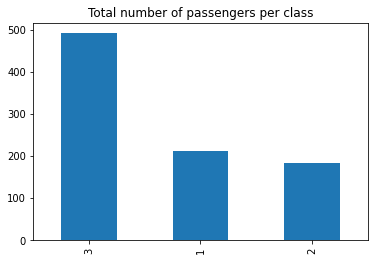

In [28]:
# Class of ticket class
# The total number of passengers per class
print(train['Pclass'].value_counts())
train['Pclass'].value_counts().plot.bar(title='Total number of passengers per class')

Third class had most passengers 491, 1 class had 214 and 2 class had 184, the fewest 

Survived    0    1
Pclass            
1          80  131
2          97   87
3         372  119
Survived         0         1
Pclass                      
1         0.379147  0.620853
2         0.527174  0.472826
3         0.757637  0.242363


Text(0.5, 1.0, 'Ratio of ticket class of survived passengers')

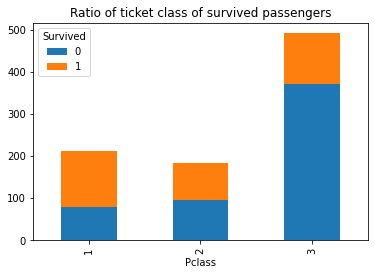

In [29]:
# Crosstab on ticket class and survival 
surv1=pd.crosstab(train['Pclass'],train['Survived'])
print(surv1)
print(pd.crosstab(train['Pclass'],train['Survived'],normalize=0))
surv1.plot.bar(stacked=True)
plt.title('Ratio of ticket class of survived passengers')

62.6% of first class passengers survived, 2nd class had a 47.28% survival rate while third class had a low 24.23% survival rate

In [30]:
# Sibling or parent count
train['SibSp'].value_counts()


0    603
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Majority of people travelled alone, while second most had 1 family member. The number reduces as the family size grows

Survived    0    1
SibSp             
0         398  205
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


Survived         0         1
SibSp                       
0         0.660033  0.339967
1         0.464115  0.535885
2         0.535714  0.464286
3         0.750000  0.250000
4         0.833333  0.166667
5         1.000000  0.000000
8         1.000000  0.000000


Text(0.5, 1.0, 'Ratio of survived passengers and number of accompanying family member')

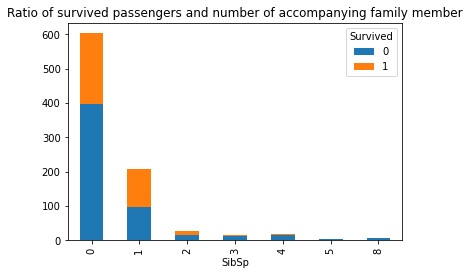

In [31]:
# Crosstab on family members and survival 
surv1=pd.crosstab(train['SibSp'],train['Survived'])
print(surv1)
print('\n')
print(pd.crosstab(train['SibSp'],train['Survived'],normalize=0))
surv1.plot.bar(stacked=True)
plt.title('Ratio of survived passengers and number of accompanying family member')

Those who had a 1 family member had the highest survival rating of 53.59% followed by family 2 family members (46.42%), travelling alone 34.32%. A larger number of SibPs had a lower survival rate, some cases a 0% rate


Survived    0    1
Embarked          
C          75   90
Q          47   30
S         427  217
Survived         0         1
Embarked                    
C         0.454545  0.545455
Q         0.610390  0.389610
S         0.663043  0.336957


Text(0.5, 1.0, 'Gender ratio of survived passengers')

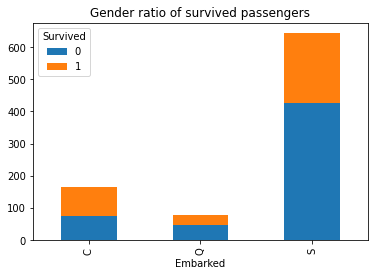

In [32]:
# Embark port
surv2=pd.crosstab(train['Embarked'],train['Survived'])
print(surv2)
print(pd.crosstab(train['Embarked'],train['Survived'],normalize=0))
surv2.plot.bar(stacked=True)
plt.title('Gender ratio of survived passengers')

Port C had the best survival ratio of 55.357%. port Q had 38.96% while Port S had a low 33.69%. This gives a bias to the embarkment port.

Survived    0    1
Parch             
0         445  229
1          53   64
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0
Survived         0         1
Parch                       
0         0.660237  0.339763
1         0.452991  0.547009
2         0.500000  0.500000
3         0.400000  0.600000
4         1.000000  0.000000
5         0.800000  0.200000
6         1.000000  0.000000


Text(0.5, 1.0, 'Gender ratio of survived passengers')

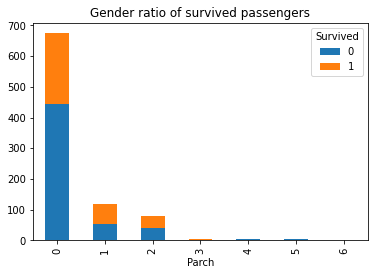

In [33]:
# Embark port
surv2=pd.crosstab(train['Parch'],train['Survived'])
print(surv2)
print(pd.crosstab(train['Parch'],train['Survived'],normalize=0))
surv2.plot.bar(stacked=True)
plt.title('Gender ratio of survived passengers')

The best survival rate decreases with increased number of parents and childrenwith the highest being 3 children. Larger families have a low probability of survival

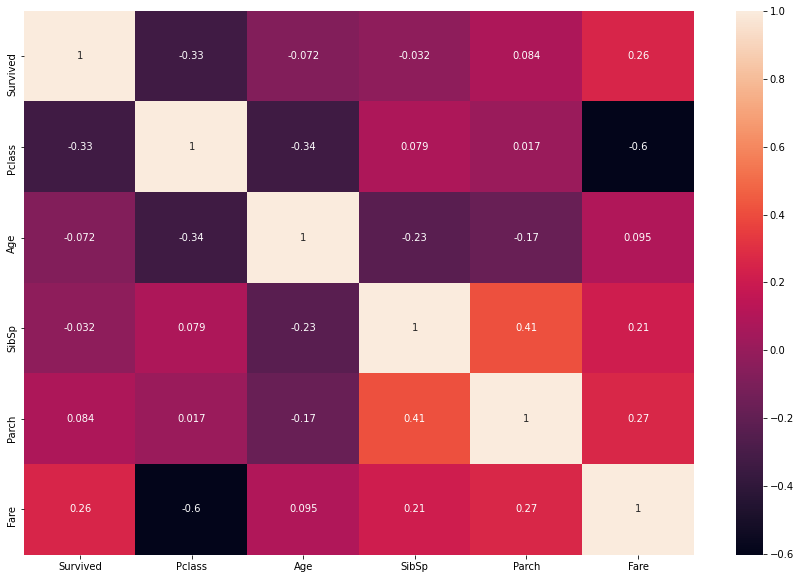

In [34]:
# We check the correlation
corr=train.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr,annot=True)

The features are not strongly correlated. Pclass and Fare has the strongest correlation coeffiecient of -0.55.

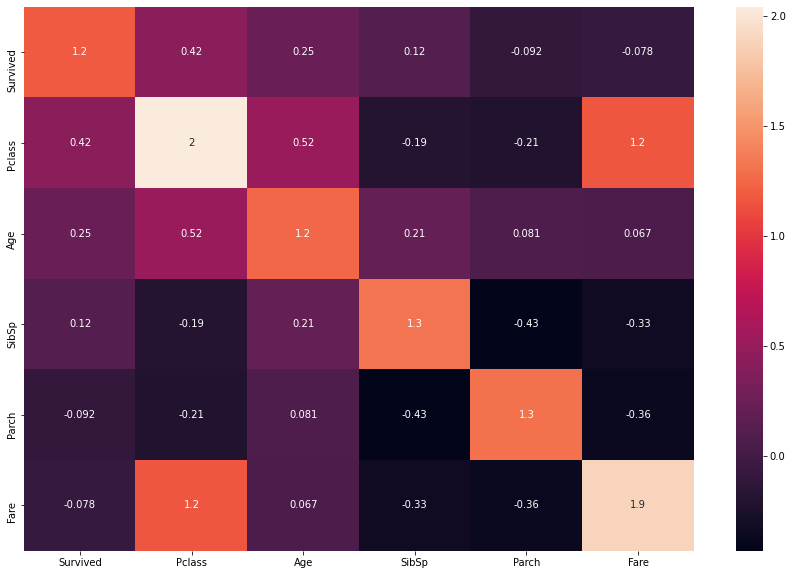

In [35]:

vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, 
                   columns = corr.columns)

plt.figure(figsize = (15, 10))
sns.heatmap(vif, annot = True)

All the VIF scores are low. 

## Feature Engineering
Label encoding

Sex: male = 1 and female = 0

Embarked: C = 0, Q = 1 and S = 2

In [36]:
# Encoding using label encoder
from sklearn.preprocessing import LabelEncoder

train = train.apply(LabelEncoder().fit_transform)
print(train.head())
print('\n')
test = test.apply(LabelEncoder().fit_transform)
test.head()



   Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         0       2    1   28      1      0    18         2
1         1       0    0   51      1      0   207         0
2         1       2    0   34      0      0    41         2
3         1       0    0   47      1      0   189         2
4         0       2    1   47      0      0    43         2




,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,44,0,0,24,1
1,2,0,60,1,0,5,2
2,1,1,72,0,0,41,1
3,2,1,34,0,0,34,2
4,2,0,27,1,1,46,2


## Implementing the solution

### Splitting datasets
We will then split our training set, into training and testing set since our given testing set has no label. We will later use this test set

In [37]:
#Separate features from target
X = train.iloc[:, 1:8].values
y = train.iloc[:, 0].values


Scaling our datasets
For K-NN algorithm it is very important for all data points to be in the same range, ewe will therefore scale our training set

In [38]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape

((708, 7), (708,))

## Modelling with KNN algorithm

With defaults

In [52]:
my_tests = [0.1, 0.2, 0.3, 0.4, 0.5]

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,accuracy_score


for test in my_tests:
    X_train, X_test, y_train, y_test = tts(X, y, test_size = test, random_state = 12)
    
    # scaling the training data
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # fitting to classifier
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    
    # making predictions
    y_pred = classifier.predict(X_test)

    # evaluating the algorithm
    print("Test size {} has Accuracy score:".format(test),accuracy_score(y_test, y_pred))



Test size 0.1 has Accuracy score: 0.8202247191011236
Test size 0.2 has Accuracy score: 0.797752808988764
Test size 0.3 has Accuracy score: 0.7969924812030075
Test size 0.4 has Accuracy score: 0.8140845070422535
Test size 0.5 has Accuracy score: 0.8284424379232506


We test using different testing sizes and 50/50 train test split is the best test size.but it is illogical meaning 90/10 gives a better train test split. We shall use a default 80-20 split and see if the model improves.

In [53]:

#Create KNN Object.
knn = KNeighborsClassifier()

#Training the model.
model = knn.fit(X_train, y_train)

#Predict test data set.
y_pred = model.predict(X_test)

#Checking performance our model with skitlearn metrics.
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,accuracy_score
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report')
print(classification_report(y_test, y_pred))
print('\n')
print('accuracy_score= ',accuracy_score(y_test, y_pred))
print('ROC Score= ',roc_auc_score(y_test, y_pred))


Confusion Matrix
[[234  33]
 [ 43 133]]


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       267
           1       0.80      0.76      0.78       176

    accuracy                           0.83       443
   macro avg       0.82      0.82      0.82       443
weighted avg       0.83      0.83      0.83       443



accuracy_score=  0.8284424379232506
ROC Score=  0.8160431562819205


The accuracy score of 0.8033 and ROC score of 0.7877 is a good one, but can we improve it?

## Challenging the solution
Hyperparameter Tuning

In [54]:
# optimizing by normalizing
from sklearn.preprocessing import Normalizer
normal = Normalizer()
X_train = normal.fit_transform(X_train)
X_test = normal.transform(X_test)

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

knn = KNeighborsClassifier()

params = {'n_neighbors' : list(range(1,30)),
         'weights' : ['uniform', 'distance'],
         'metric' : ['manhattan', 'euclidean', 'minkowski']
          ,'leaf_size' : list(range(1,50)),'p':[1,2,3]}


rscv = RandomizedSearchCV(knn, params,cv=10)
rscv.fit(X_train, y_train)
print("Best parameters:", rscv.best_params_)



We test using our best parameters and see which test size has the best model to predict

In [55]:
knn2 = KNeighborsClassifier(leaf_size=12, n_neighbors=12, p=1,metric='manhattan',weights= 'uniform')

#Training the model.
model2 = knn2.fit(X_train, y_train)

#Predict test data set.
y_pred2 = model2.predict(X_test)

#Checking performance our model with skitlearn metrics.
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,accuracy_score
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred2))
print('\n')
print('Classification Report')
print(classification_report(y_test, y_pred2))
print('\n')
print('accuracy_score= ',accuracy_score(y_test, y_pred2))
print('ROC Score= ',roc_auc_score(y_test, y_pred2))

Confusion Matrix
[[248  19]
 [ 60 116]]


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       267
           1       0.86      0.66      0.75       176

    accuracy                           0.82       443
   macro avg       0.83      0.79      0.80       443
weighted avg       0.83      0.82      0.82       443



accuracy_score=  0.8216704288939052
ROC Score=  0.7939649302008853


The Acuuracy and roc score has increased slightly to 82.16% after hyperparameter tuning. 79 data points are misclassified. Lets see what 90-10 split can give us.

90-10 Ratio

In [56]:
# Train using 90% of the data.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.1, random_state=0)
X1_train.shape, y1_train.shape

((797, 7), (797,))

In [57]:
knn3 = KNeighborsClassifier(leaf_size=12, n_neighbors=12, p=1,metric='manhattan',weights= 'uniform')

#Training the model.
model3 = knn3.fit(X1_train, y1_train)

#Predict test data set.
y1_pred = model3.predict(X1_test)

#Checking performance our model with skitlearn metrics.
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,accuracy_score
print('Confusion Matrix')
print(confusion_matrix(y1_test, y1_pred))
print('\n')
print('Classification Report')
print(classification_report(y1_test, y1_pred))
print('\n')
print('accuracy_score= ',accuracy_score(y1_test, y1_pred))
print('ROC Score= ',roc_auc_score(y1_test, y1_pred))

Confusion Matrix
[[52  8]
 [ 8 21]]


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        60
           1       0.72      0.72      0.72        29

    accuracy                           0.82        89
   macro avg       0.80      0.80      0.80        89
weighted avg       0.82      0.82      0.82        89



accuracy_score=  0.8202247191011236
ROC Score=  0.7954022988505747


The 90-10 split gives a worse Accuracy score(82.02< 82.16) but a slightly better ROC score than 80-20 (79.54>79.39). So theres is little difference in both models. 16 data points are misclassified. 

70-30 Ratio

In [58]:
# Train using 70% of the data.
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=0)
X2_train.shape, y2_train.shape

((620, 7), (620,))

In [59]:
knn4 = KNeighborsClassifier(leaf_size=12, n_neighbors=12, p=1,metric='manhattan',weights= 'uniform')

#Training the model.
model4= knn4.fit(X2_train, y2_train)

#Predict test data set.
y2_pred = model4.predict(X2_test)

#Checking performance our model with skitlearn metrics.
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,accuracy_score
print('Confusion Matrix')
print(confusion_matrix(y2_test, y2_pred))
print('\n')
print('Classification Report')
print(classification_report(y2_test, y2_pred))
print('\n')
print('accuracy_score= ',accuracy_score(y2_test, y2_pred))
print('ROC Score= ',roc_auc_score(y2_test, y2_pred))

Confusion Matrix
[[153  15]
 [ 31  67]]


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       168
           1       0.82      0.68      0.74        98

    accuracy                           0.83       266
   macro avg       0.82      0.80      0.81       266
weighted avg       0.83      0.83      0.82       266



accuracy_score=  0.8270676691729323
ROC Score=  0.7971938775510203


We have an higher accuracy score 82.706 and ROC score (79.72) than 80-20 and the 90-30 split. Therefore it gives a better model. 46 data points are misclassified.

60-40 Ratio

In [60]:
# Train using 60% of the data.
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.4, random_state=0)
X3_train.shape, y3_train.shape

((531, 7), (531,))

In [61]:
knn5 = KNeighborsClassifier(leaf_size=12, n_neighbors=12, p=1,metric='manhattan',weights= 'uniform')

#Training the model.
model5= knn5.fit(X3_train, y3_train)

#Predict test data set.
y3_pred = model4.predict(X3_test)

#Checking performance our model with skitlearn metrics.
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,accuracy_score
print('Confusion Matrix')
print(confusion_matrix(y3_test, y3_pred))
print('\n')
print('Classification Report')
print(classification_report(y3_test, y3_pred))
print('\n')
print('accuracy_score= ',accuracy_score(y3_test, y3_pred))
print('ROC Score= ',roc_auc_score(y3_test, y3_pred))

Confusion Matrix
[[212  16]
 [ 42  85]]


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       228
           1       0.84      0.67      0.75       127

    accuracy                           0.84       355
   macro avg       0.84      0.80      0.81       355
weighted avg       0.84      0.84      0.83       355



accuracy_score=  0.8366197183098592
ROC Score=  0.799557949993093


60-40 gives us a higher accuracy score 83.66 and ROC score (79.95) than any other test split model. Therefore it gives a best model.



## Conclusion


The model that best classifies passengers who survived from those who didn't is when hyperparameters are tuned as follows:
- leaf_size=12, 
- n_neighbors=12, 
- p=1,
- metric= manhattan,
- weights= uniform

and with a 60-40 split.

Also, data needs to be scaled
